<a href="https://colab.research.google.com/github/pknemi/PPE-Detection_YOLO/blob/main/Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PPE Detection Using YOLO

This project focuses on developing an object detection model to identify Personal Protective Equipment (PPE) such as helmets, gloves, safety vests, and masks using computer vision techniques. The goal is to build a robust system that ensures compliance with workplace safety regulations in environments like construction sites, factories, and laboratories. Leveraging YOLOv8, the model efficiently detects PPE in images, aiding in safety monitoring and enforcement.

🔹 Model: YOLOv8-based object detection

🔹 Objective: PPE compliance monitoring

🔹 Application Areas: Construction, Manufacturing, Laboratories

🔹 Output: Predicted images with detected PPE items

This Colab notebook provides a streamlined workflow for training and testing the model on real-world workplace scenarios.

In [ ]:
!pip install ultralytics

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading and Utilizing YOLO Model with Ultralytics

In [5]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


#Custom Data Training

In [5]:
!yolo task=detect mode=train model=yolov8l.pt data=/content/drive/MyDrive/PPEDetectionDataset/data.yaml epochs=50 imgsz=640


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/PPEDetectionDataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

#Displaying YOLO Training Results

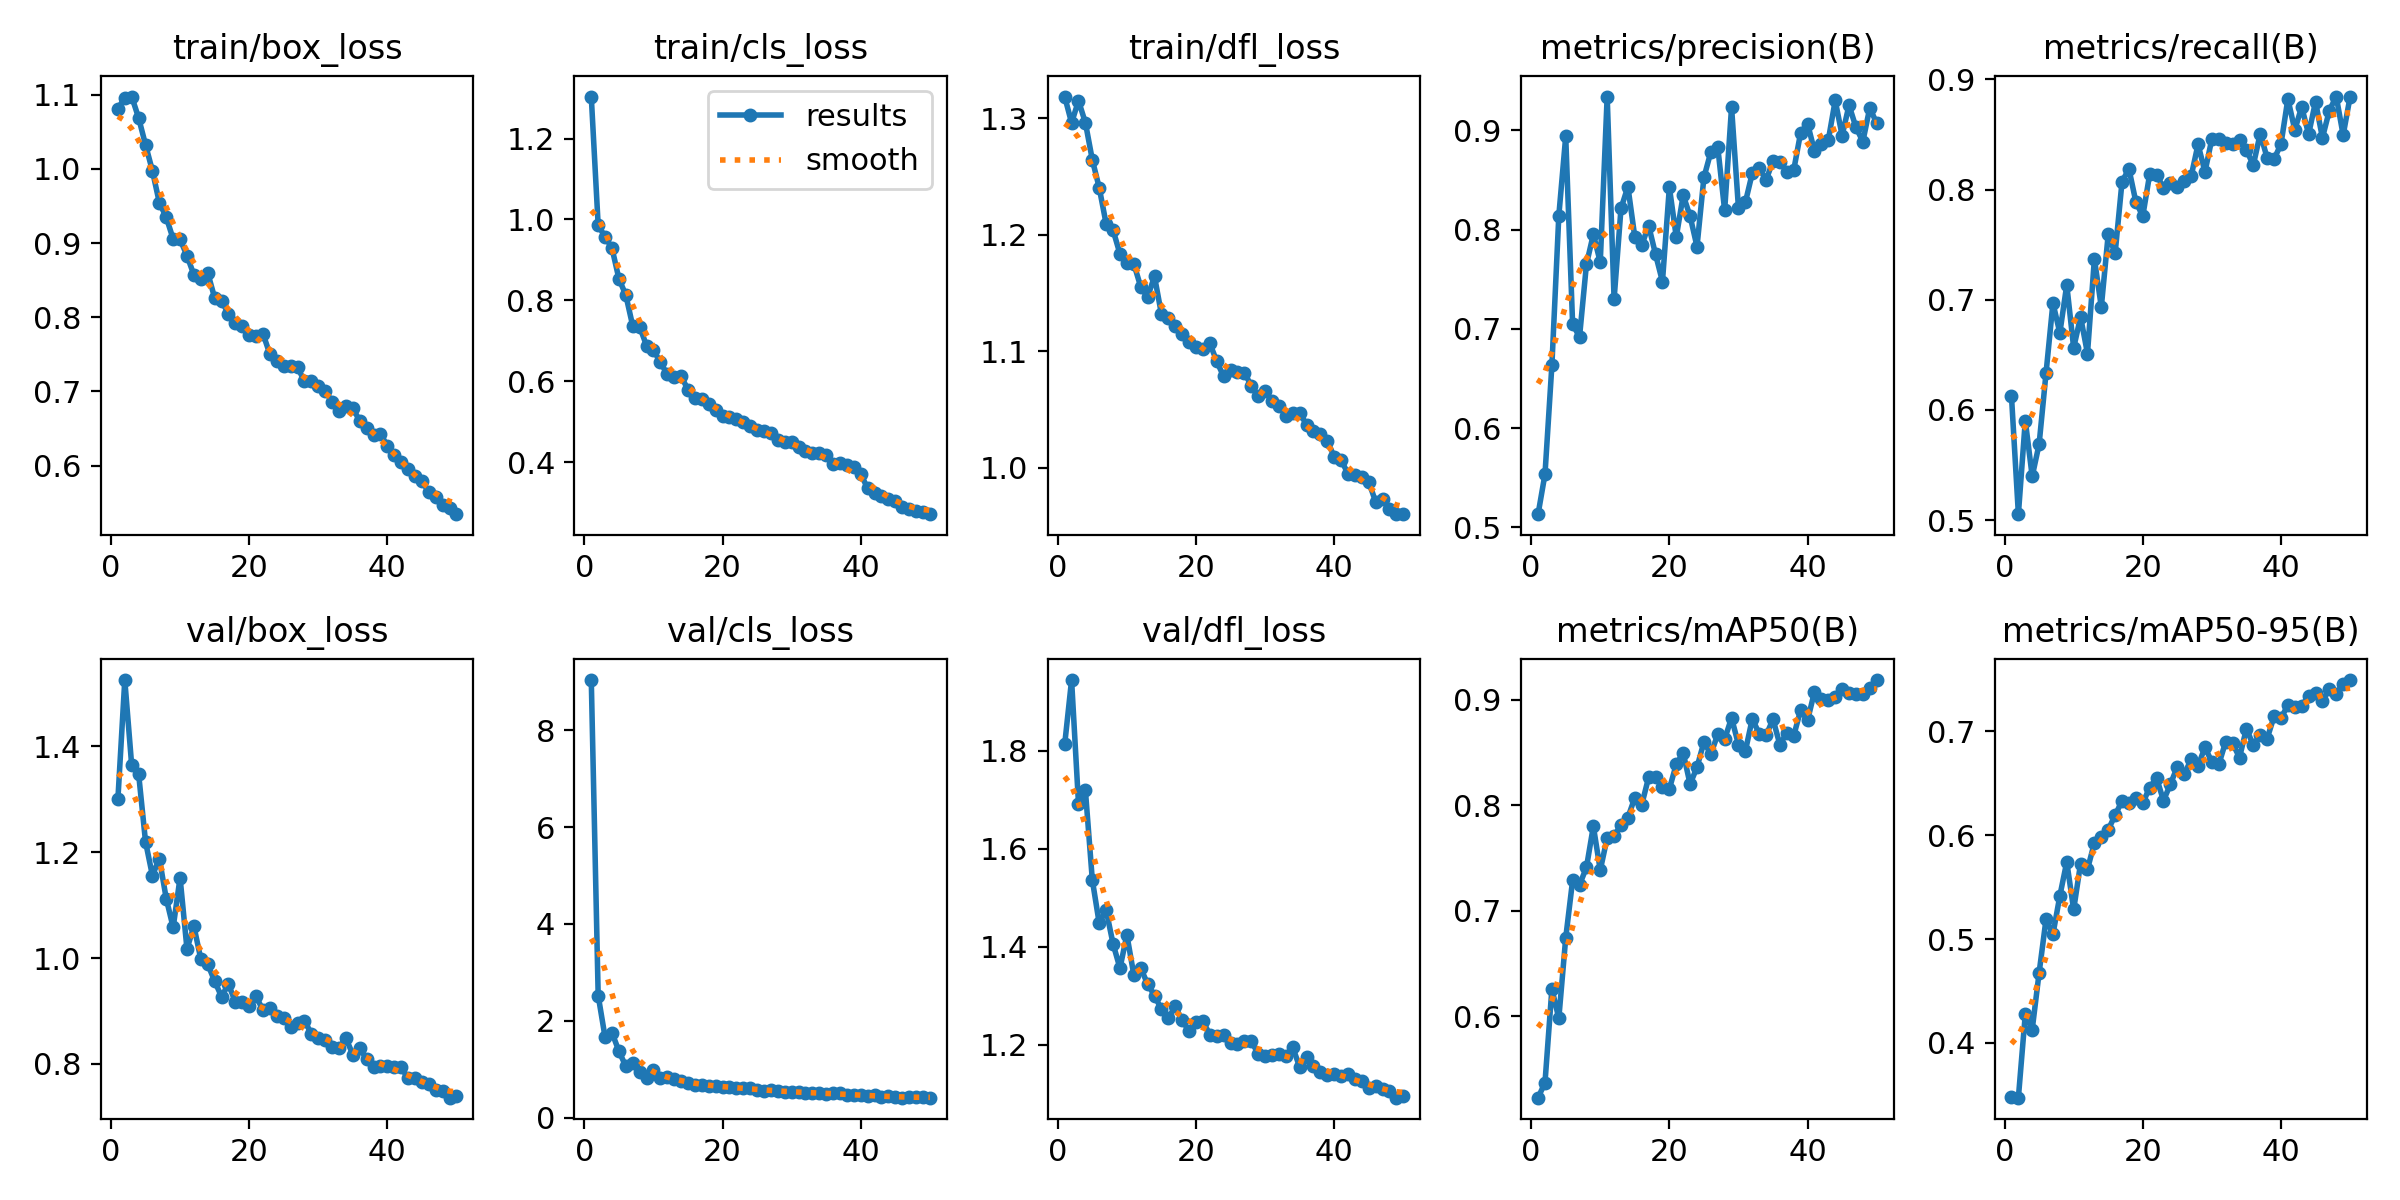

In [6]:
from IPython.display import display, Image
display(Image(filename='runs/detect/train/results.png'))


#Validating Trained YOLOv8 Model on PPE Dataset

In [8]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=/content/drive/MyDrive/PPEDetectionDataset/data.yaml


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1-4d4XatIdTOGo7KCakXMVZPdz1F3ikYe/PPEDetectionDataset/valid/labels.cache... 420 images, 0 backgrounds, 0 corrupt: 100% 420/420 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 27/27 [00:18<00:00,  1.47it/s]
                   all        420       1797      0.907      0.884      0.918       0.75
                 boots        276        593      0.958      0.951      0.981      0.762
                gloves         23         41      0.764      0.633      0.687      0.477
                helmet        273        320      0.939      0.963      0.978      0.772
                 human        302        376      0.928      0.934      0.963       0.88
                  vest        354        467      0.947       0.9

#Running YOLOv8 PPE Detection on Test Image

In [11]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/PPEDetectionDataset/test/images/00100_jpg.rf.6db1fdd5b22dce6d02ecd3c5aed754a8.jpg save=True


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/PPEDetectionDataset/test/images/00100_jpg.rf.6db1fdd5b22dce6d02ecd3c5aed754a8.jpg: 640x640 2 helmets, 2 vests, 62.7ms
Speed: 2.9ms preprocess, 62.7ms inference, 191.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


#Displaying YOLOv8 Detection Results

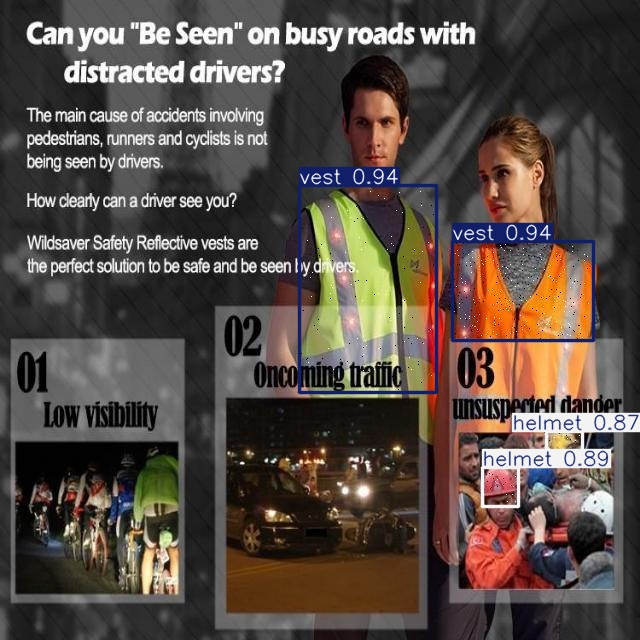

In [12]:
from IPython.display import display, Image
import glob

# Get the latest predicted image
predicted_image = glob.glob('/content/runs/detect/predict3/00100_jpg.rf.6db1fdd5b22dce6d02ecd3c5aed754a8.jpg')[0]
display(Image(filename=predicted_image))


In [21]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/PPEDetectionDataset/test/images/Video2_7_jpg.rf.b062d5e03f4cc2eb8393f3303e8f8ed4.jpg save=True


Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/PPEDetectionDataset/test/images/Video2_7_jpg.rf.b062d5e03f4cc2eb8393f3303e8f8ed4.jpg: 640x640 2 bootss, 1 helmet, 1 human, 1 vest, 62.8ms
Speed: 5.2ms preprocess, 62.8ms inference, 228.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


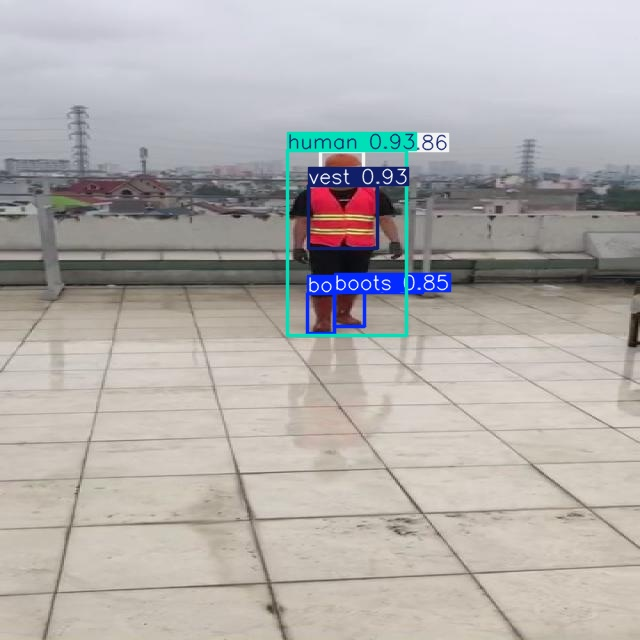

In [22]:

predicted_image = glob.glob('/content/runs/detect/predict7/Video2_7_jpg.rf.b062d5e03f4cc2eb8393f3303e8f8ed4.jpg')[0]



# Display the image
display(Image(filename=predicted_image))


In [26]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=/content/drive/MyDrive/PPEDetectionDataset/test/images/images-2022-07-04T013646-1-_jpg.rf.dbe17cdf87a5e67896ecbcc56a9dba0c.jpg save=True

Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/PPEDetectionDataset/test/images/images-2022-07-04T013646-1-_jpg.rf.dbe17cdf87a5e67896ecbcc56a9dba0c.jpg: 640x640 2 glovess, 59.4ms
Speed: 3.5ms preprocess, 59.4ms inference, 155.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict9
💡 Learn more at https://docs.ultralytics.com/modes/predict


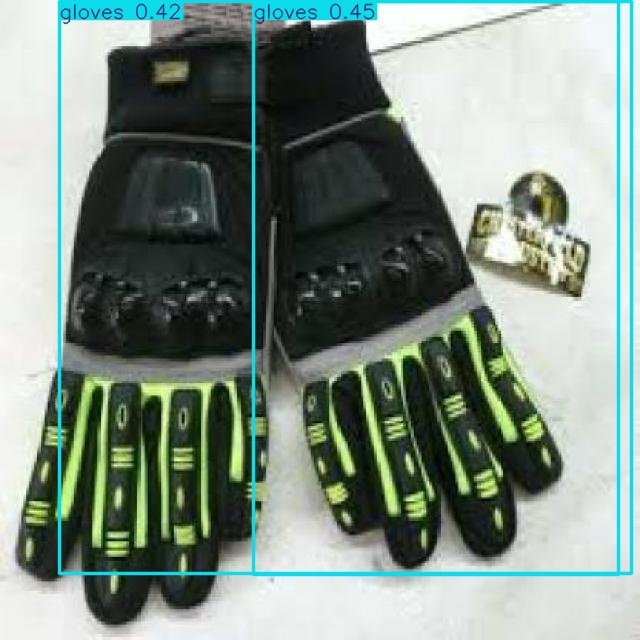

In [27]:

predicted_image = glob.glob('/content/runs/detect/predict9/images-2022-07-04T013646-1-_jpg.rf.dbe17cdf87a5e67896ecbcc56a9dba0c.jpg')[0]



# Display the image
display(Image(filename=predicted_image))

In [17]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source=!yolo task=detect mode=predict model=/content/best.pt source=/content/drive/MyDrive/PPEDetectionDataset/test/images/image_190_jpg.rf.a9f91cbc4054fb305b4c0fd5bd2d1719.jpg save=True

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 112 layers, 43,610,463 parameters, 0 gradients, 164.8 GFLOPs

image 1/1 /content/drive/MyDrive/PPEDetectionDataset/test/images/image_190_jpg.rf.a9f91cbc4054fb305b4c0fd5bd2d1719.jpg: 640x640 2 bootss, 1 helmet, 1 human, 1 vest, 62.8ms
Speed: 4.4ms preprocess, 62.8ms inference, 224.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


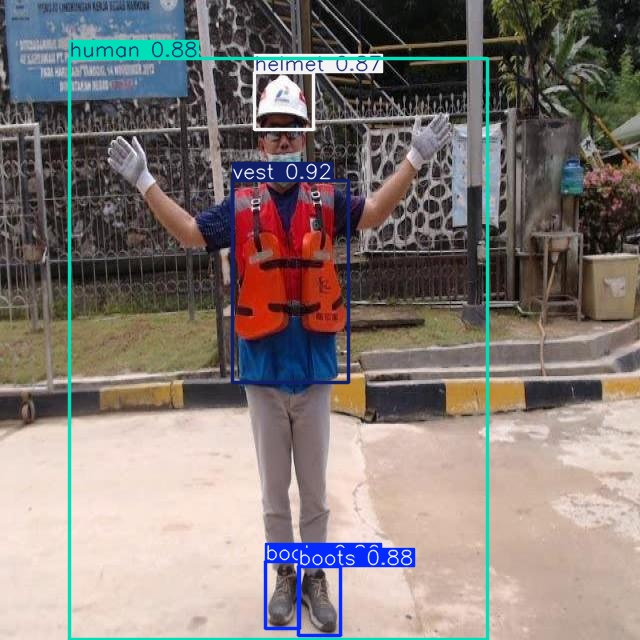

In [18]:
from IPython.display import display
from PIL import Image

display(Image.open("/content/runs/detect/predict4/image_190_jpg.rf.a9f91cbc4054fb305b4c0fd5bd2d1719.jpg"))
